In [1]:
from quspin.operators import hamiltonian # Hamiltonians and operators
from quspin.basis import spin_basis_1d # Hilbert space spin basis
import numpy as np # generic math functions
import matplotlib.pyplot as plt
%matplotlib inline

### Sanity check for QuSpin: Guage potential
$H=\sigma_z + \lambda \sigma_x$ . $A_{\lambda}= \sigma_y/4$

In [86]:
L=1 # system size

basis = spin_basis_1d(L)
hz=2.0
hx=1.0
hz_arr = [[hz,i] for i in range(L)] # OBC
hx_arr = [[hx,i] for i in range(L)] # OBC
# static and dynamic lists
static = [["z",hz_arr], ["x",hx_arr] ]
dynamic =[]
H = hamiltonian(static,dynamic,basis=basis,dtype=np.complex_)


# \partial lambda H
hx_lamb=1.0
hx_lamb_arr = [[hx_lamb,i] for i in range(L)] # OBC
static_lamb = [["x",hx_lamb_arr]]
dynamic_lamb =[]
op_lamb=hamiltonian(static_lamb,dynamic_lamb,basis=basis,dtype=np.complex_)

Hermiticity check passed!
Symmetry checks passed!
Hermiticity check passed!
Symmetry checks passed!


In [145]:
E,V= H.eigh()
wij = (np.outer(E,np.ones(2**L))-np.outer(np.ones(2**L),E))
num_lamb = np.dot(V,np.dot(op_lamb.toarray(),np.conj(V)))
wij=wij+np.identity(2)
A_lamb = -1j*num_lamb/wij

In [151]:
np.fill_diagonal(A_lamb, 0.0)
print A_lamb

[[ 0.+0.j  -0.-0.2j]
 [ 0.+0.2j  0.+0.j ]]


I have seen that I get the correct result for single body operator. Now I can compute results for many body systems. I want two figures how norm of gauge potential scales with L and how approximate guage potential scales with system size.

### Better format of above code for single body hamiltonian

In [101]:
from quspin.operators import hamiltonian # Hamiltonians and operators
from quspin.basis import spin_basis_1d # Hilbert space spin basis
import numpy as np # generic math functions
import matplotlib.pyplot as plt



L=1
def Ham(L):
    basis = spin_basis_1d(L)
    hz=1.0
    hx=1.0
    hz_arr = [[hz,i] for i in range(L)] # OBC
    hx_arr = [[hx,i] for i in range(L)] # OBC
    # static and dynamic lists
    static = [["z",hz_arr], ["x",hx_arr] ]
    dynamic =[]
    H = hamiltonian(static,dynamic,basis=basis,dtype=np.complex_)
    return H


def del_lambda_Ham_single(L):
    basis = spin_basis_1d(L)
    hx_lamb=1.0
    hx_lamb_arr = [[hx_lamb,i] for i in range(L)] # OBC
    static_lamb = [["x",hx_lamb_arr]]
    dynamic_lamb =[]
    op_lamb=hamiltonian(static_lamb,dynamic_lamb,basis=basis,dtype=np.complex_)
    return op_lamb

def guage_potent_single(L):
    H=Ham(L)
    E,V= H.eigh()
    op_lamb= del_lambda_Ham(L)
    
    wij = (np.outer(E,np.ones(2**L))-np.outer(np.ones(2**L),E))
    num_lamb = np.dot(V,np.dot(op_lamb.toarray(),np.conj(V)))
    wij=wij+np.identity(2)
    A_lamb = -1j*num_lamb/wij
    np.fill_diagonal(A_lamb, 0.0)
    return A_lamb

def norm_single(A_lamb):    
    return np.linalg.norm(A_lamb, 'fro')

In [218]:
#print  guage_potent(1)
#print norm(guage_potent(1))
print del_lambda_Ham(2)

Hermiticity check passed!
Symmetry checks passed!
static mat: 
  (0, 1)	(1+0j)
  (0, 2)	(1+0j)
  (1, 0)	(1+0j)
  (1, 3)	(1+0j)
  (2, 0)	(1+0j)
  (2, 3)	(1+0j)
  (3, 1)	(1+0j)
  (3, 2)	(1+0j)


dynamic:



### Many body hamiltonian: non -integrable and integrable cases
$H=J \sum \sigma_{i}^x \sigma_{i+1}^x+ h_x \sum \sigma_i^x + h_z \sum \sigma_i^z$ where $\partial_{\lambda}H= \sigma_x$

In [146]:
from quspin.operators import hamiltonian # Hamiltonians and operators
from quspin.basis import spin_basis_1d # Hilbert space spin basis
import numpy as np # generic math functions
import matplotlib.pyplot as plt


def Ham_nonint(L):
    basis = spin_basis_1d(L)
    hz=(np.sqrt(5)+1)/4 #parameters used by Kim and Huse
    hx=(np.sqrt(5)+5)/8
    J=1.0
    hz_arr = [[hz,i] for i in range(L)] # OBC
    hx_arr = [[hx,i] for i in range(L)] # OBC
    J_arr = [[J,i,(i+1)%L] for i in range(L)] # PBC
    
    # static and dynamic lists
    static = [["xx",J_arr],["z",hz_arr], ["x",hx_arr] ]
    dynamic =[]
    H = hamiltonian(static,dynamic,basis=basis,dtype=np.complex_,check_symm=False,check_herm=False)
    return H

def Ham_int(L):
    basis = spin_basis_1d(L)
    hz=(np.sqrt(5)+1)/4 #parameters used by Kim and Huse
    hx=0.0#(np.sqrt(5)+5)/8
    J=1.0
    hz_arr = [[hz,i] for i in range(L)] # OBC
    hx_arr = [[hx,i] for i in range(L)] # OBC
    J_arr = [[J,i,(i+1)%L] for i in range(L)] # PBC
    
    # static and dynamic lists
    static = [["xx",J_arr],["z",hz_arr], ["x",hx_arr] ]
    dynamic =[]
    H = hamiltonian(static,dynamic,basis=basis,dtype=np.complex_,check_symm=False,check_herm=False)
    return H

def del_lambda_Ham(L):
    basis = spin_basis_1d(L)
    hx_lamb=1.0
    hx_lamb_arr = [[hx_lamb,i] for i in range(L)] # OBC
    static_lamb = [["x",hx_lamb_arr]]
    dynamic_lamb =[]
    op_lamb=hamiltonian(static_lamb,dynamic_lamb,basis=basis,dtype=np.complex_,check_symm=False,check_herm=False)
    return op_lamb

def guage_potent(L):
    H=Ham_nonint(L)
    E,V= H.eigh()
    op_lamb= del_lambda_Ham(L)
    
    wij = (np.outer(E,np.ones(2**L))-np.outer(np.ones(2**L),E))
    num_lamb = np.dot(V,np.dot(op_lamb.toarray(),np.conj(V)))
    wij=wij+np.identity(2**L)
    A_lamb = -1j*num_lamb/wij
    np.fill_diagonal(A_lamb, 0.0)
    return A_lamb

def norm(A_lamb):    
    return np.linalg.norm(A_lamb, 'fro')

Somehow for odd powers, I am getting degenerate eigenvalues. Need to think about it more.

In [74]:
for i in range(2,8):
    L=i
    A_lamb=guage_potent(L)
    print L,norm(A_lamb)   

2 1.16310406783
3 3.69749211332e+15
4 1.96909753875e+14
5 nan


/home/mohit/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:39: RuntimeWarning: divide by zero encountered in divide
/home/mohit/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:39: RuntimeWarning: invalid value encountered in divide


6 6.86395540837e+14
7 nan


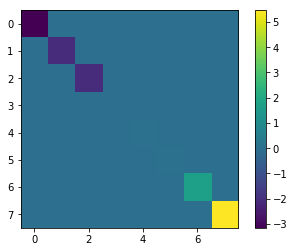

In [76]:
x=Ham_nonint(3).toarray()
E,V=np.linalg.eigh(x)
#print len(E)
#print E*np.identity(len(E))
#x_r=np.real(x)
#x_im=np.imag(x)
plt.imshow(E*np.identity(len(E)))
#plt.imshow(x_im)
plt.colorbar()

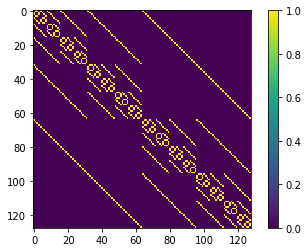

In [56]:
x=del_lambda_Ham(7).toarray()
x_r=np.real(x)
x_im=np.imag(x)
plt.imshow(x_r)
#plt.imshow(x_im)
plt.colorbar()

### Removing degenerate subspace from guage potential
+ First, I need to check $\langle m (\lambda)|\partial_{\lambda}H | n (\lambda) \rangle =0$ for $n\neq m$ and when they are degenerate. If this is true, then matrix element corresponding to this $n,m$ should be zero, and hence, doesn't contribute to norm of guage potential.
+ This python trick might be useful https://stackoverflow.com/questions/11953867/how-do-i-find-out-eigenvectors-corresponding-to-a-particular-eigenvalue-of-a-mat

In [78]:
L=5
A_lamb=guage_potent(L)
print L,norm(A_lamb)   

5 nan


/home/mohit/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:39: RuntimeWarning: divide by zero encountered in divide
/home/mohit/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:39: RuntimeWarning: invalid value encountered in divide


In [80]:
H=Ham_nonint(L)
E,V= H.eigh()
print E

[-5.64305376 -4.97445235 -4.97445235 -4.04462557 -4.04462557 -2.75392588
 -2.75392588 -2.46472336 -2.2161175  -2.2161175  -1.70923464 -1.50164884
 -1.50164884 -0.85012203 -0.85012203 -0.05509412  0.24675298  0.24675298
  0.63352059  0.63352059  1.57802813  1.84893934  1.84893934  1.95926222
  1.95926222  2.76327452  3.55823195  3.55823195  4.09418509  4.09418509
  4.43630438  9.09449885]


In [81]:
from collections import Counter
[item for item, count in Counter(E).iteritems() if count > 1]

[-2.7539258790635386]

In [83]:
x=[1,2,2,3,4,5,6,4]
from collections import Counter
[item for item, count in Counter(x).iteritems() if count > 1]

[2, 4]

### Approximate gauge potential 
We don't have problem of degenerate states here when we include $\mu$. 
+ Our gauge potential is given by: $  A_{\lambda}^{nm}= -i \hbar \dfrac{\partial_{\lambda}H^{nm}}{\omega_{nm}^2 + \mu^2} \omega_{nm}$
+ For non-zero $\mu$, gauge potential is an approximate one.

In [102]:
def guage_potent_mu(Ham,L, mu):
    E,V= Ham.eigh()
    op_lamb= del_lambda_Ham(L)
    wij = (np.outer(E,np.ones(2**L))-np.outer(np.ones(2**L),E))
    num_lamb = np.dot(V,np.dot(op_lamb.toarray(),np.conj(V)))
    wij=wij+np.identity(2**L)
    A_lamb = -1j*num_lamb*wij/(wij**2+ mu**2)
    np.fill_diagonal(A_lamb, 0.0)
    return A_lamb

In [103]:
H=Ham(1)

Hermiticity check passed!
Symmetry checks passed!


In [104]:
guage_potent_mu(H,1,0.0)

array([[ 0.+0.j  , -0.-0.25j],
       [ 0.+0.25j,  0.+0.j  ]])

In [134]:
mu=0.1
Ntot=10
length=np.zeros(Ntot-2)
norm_arr=np.zeros(Ntot-2)
for i in range(2,Ntot):
    L=i
    length[i-2]=i
    H=Ham_nonint(L)
    A_lamb=guage_potent_mu(H,L,mu)
    norm_arr[i-2]=norm(A_lamb)
    print length[i-2],norm_arr[i-2]

2.0 1.00724337953
3.0 4.50953954708
4.0 5.9792931696
5.0 11.1812549648
6.0 18.66907558
7.0 28.9218897578
8.0 41.0828503163
9.0 61.5385359492


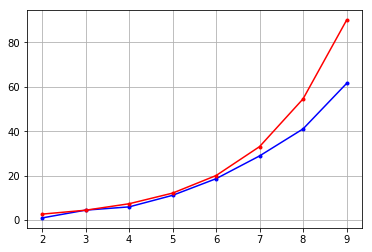

In [135]:
plt.plot(length,norm_arr, 'b.-')
plt.plot(length, np.exp(0.5*length), 'r.-')
plt.grid()

In [139]:
muTot=10
mu_arr=np.logspace(-4,1.0,muTot)

In [159]:
L=10
norm_arr=np.zeros(muTot)
H=Ham_nonint(L)
for i in range(muTot):
    mu=mu_arr[i]
    A_lamb=guage_potent_mu(H,L,mu)
    norm_arr[i]=norm(A_lamb)
    print norm_arr[i], mu_arr[i]

2453.64834386 0.0001
1478.01286375 0.00035938136638
835.476857961 0.00129154966501
434.373312487 0.00464158883361
220.705554471 0.016681005372
115.633848737 0.0599484250319
60.1259822305 0.215443469003
29.9342369033 0.774263682681
13.0272091499 2.78255940221
3.83587172162 10.0


In [158]:
muTot=10
mu_arr=np.logspace(-4,1.0,muTot)
L=10
norm_arr_int=np.zeros(muTot)
H=Ham_int(L)
for i in range(muTot):
    mu=mu_arr[i]
    A_lamb=guage_potent_mu(H,L,mu)
    norm_arr_int[i]=norm(A_lamb)
    print norm_arr_int[i], mu_arr[i]

1755.76535725 0.0001
1596.62286395 0.00035938136638
1159.27125523 0.00129154966501
641.389118887 0.00464158883361
226.057896793 0.016681005372
119.087273718 0.0599484250319
67.5934408691 0.215443469003
33.7632128932 0.774263682681
13.9295543404 2.78255940221
3.53721127458 10.0


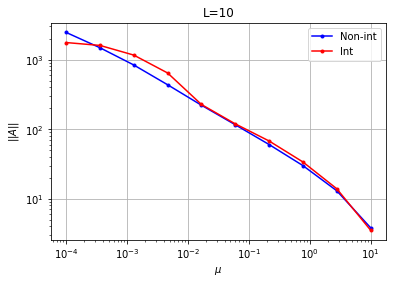

In [162]:
plt.loglog(mu_arr,norm_arr, 'b.-', label='Non-int')
plt.loglog(mu_arr,norm_arr_int, 'r.-', label='Int')
plt.xlabel(r"$\mu$")
plt.ylabel(r"$||A||$")
#plt.plot(length, np.exp(0.5*length), 'r.-')
plt.grid()
plt.title("L=10")
plt.legend()